# Resume Screening

## Importing important libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the data

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


## Data Visualization

In [73]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [74]:
print("CATEGORIES OF RESUME")
for category in resumeDataSet['Category'].unique():
  print(category)

CATEGORIES OF RESUME
Data Science
HR
Advocate
Arts
Web Designing
Mechanical Engineer
Sales
Health and fitness
Civil Engineer
Java Developer
Business Analyst
SAP Developer
Automation Testing
Electrical Engineering
Operations Manager
Python Developer
DevOps Engineer
Network Security Engineer
PMO
Database
Hadoop
ETL Developer
DotNet Developer
Blockchain
Testing


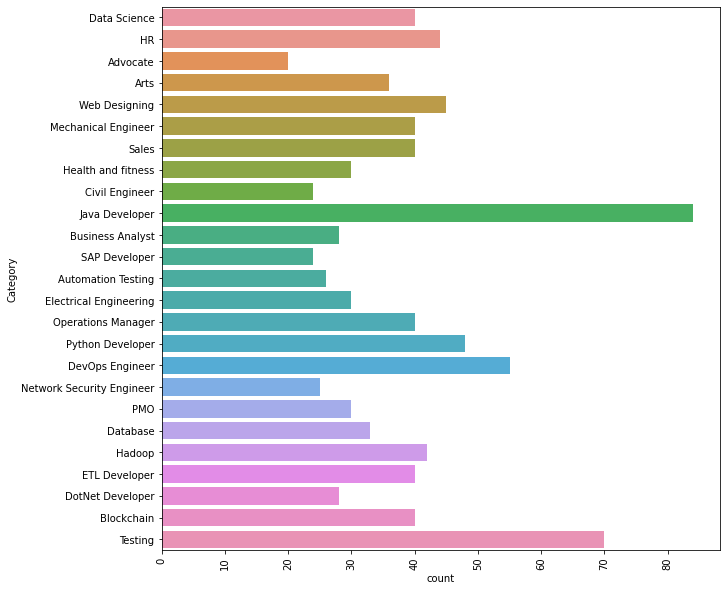

In [75]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.show()

In [76]:
print("DISTINCT CATEGORIES OF RESUME")
print(resumeDataSet['Category'].value_counts())

DISTINCT CATEGORIES OF RESUME
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Data Science                 40
Operations Manager           40
Sales                        40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


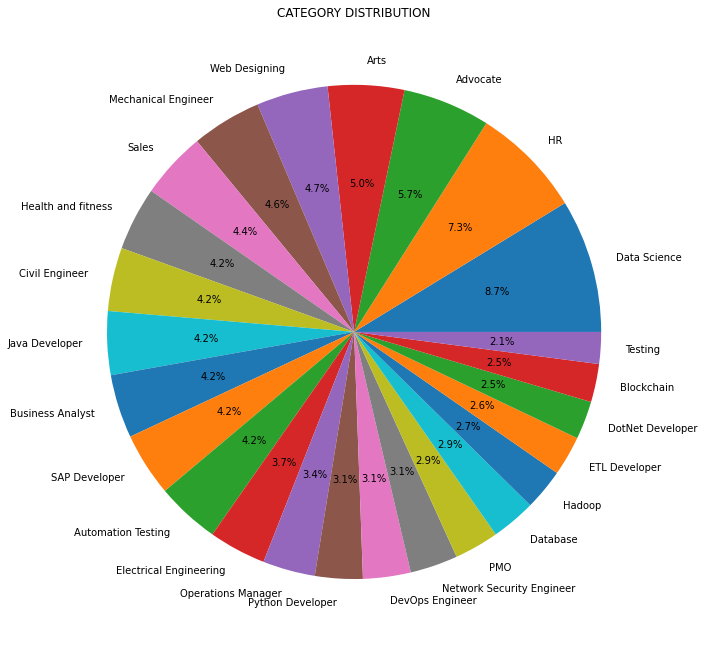

In [77]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.show()

We clean the data so we can have a look at the wordcloud

In [78]:
def clean_resume(resume_text):
    # remove URLs
    resume_text = re.sub('http\S+\s*', ' ', resume_text)
    # remove RT and cc
    resume_text = re.sub('RT|cc', ' ', resume_text)
    # remove hashtags
    resume_text = re.sub('#\S+', '', resume_text)
    # remove mentions
    resume_text = re.sub('@\S+', '  ', resume_text)
    # remove punctuations
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text)
    # remove extra whitespace 
    resume_text = re.sub('\s+', ' ', resume_text)
    return resume_text

resumeDataSet['cleaned_resume'] = ''
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: clean_resume(x))

Now a new coloum is added after 'resume' where the preprocessed resume has been stored.

In [79]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Now we can plot the wordcloud

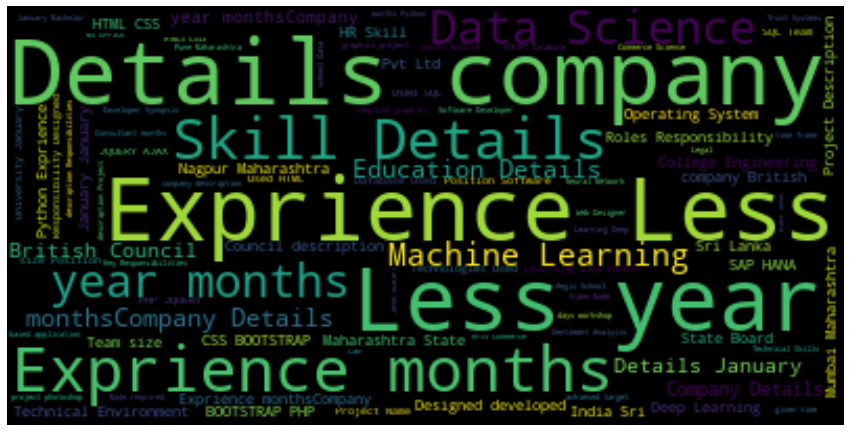

In [80]:
stop_words = set(stopwords.words('english')+['``',"''"])
tot_words =[]
sentences = resumeDataSet['Resume'].values
cleaned_sentences = ""
for i in range(0,160):
    cleaned_text = cleanResume(sentences[i])
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            tot_words.append(word)
    
wordfreqdist = nltk.FreqDist(tot_words)
mostcommon = wordfreqdist.most_common(50)

wc = WordCloud().generate(cleaned_sentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


## Training and test sets

In [82]:
X = resumeDataSet['cleaned_resume'].values
y = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
X = word_vectorizer.fit_transform(X)


In [83]:
# creating train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [84]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       0.90      1.00      0.95         9
                       HR       1.00      1.00      1.00         5
                   Hadoop       1.00      1.00      1.00     

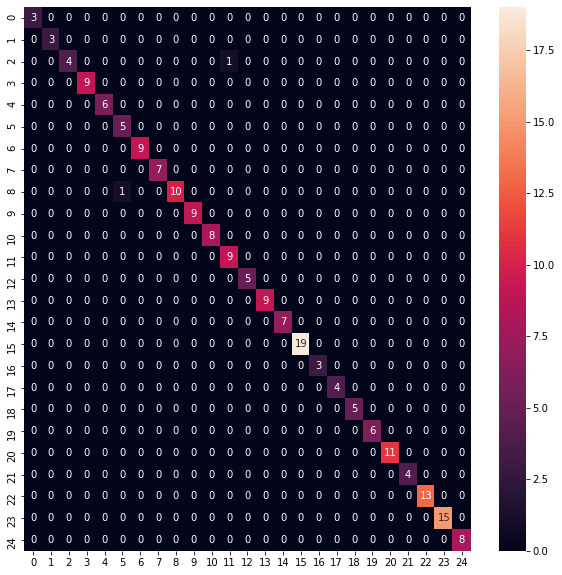

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()